In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn import svm

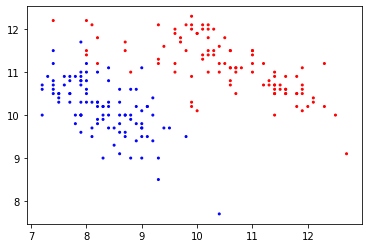

In [2]:
#Load data
swiss = genfromtxt('swiss.txt', delimiter='', skip_header=1)
Y = swiss[:,1]
X = swiss[:,[5,6]]
#Simple scatterplot
plt.scatter(X[:,0],X[:,1],c=Y,cmap='bwr',s=4)

In [3]:
def plot_svm_nonlinear(x, y, model_class, **model_params):
    #Fit model
    model = model_class(**model_params)
    model.fit(x, y)
    
    #Define grid
    h = .001     
    x_min, x_max = 7,13
    y_min, y_max = 7,13
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    #Prediction on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    #Contour + scatter plot
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.4, cmap='coolwarm',s=4)
    plt.gca().set_aspect('equal', adjustable='box')

    return plt

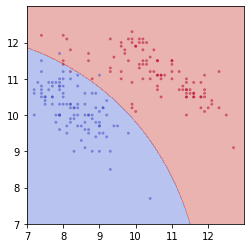

In [4]:
plot_svm_nonlinear(X,Y,svm.SVC,C=10,kernel='poly',degree=2)
plt.savefig('swiss.png', transparent=True, dpi=200)
#plt.clf()